# The only constants in my life are belief in God the Almighty and always continuing to learn.
## Here, I am trying to learn new things and refresh my knowledge once again.
## This could serve as a good template for every kind of linear regression model, as the basics are always the same.
#### The dataset can be found in my Github in repo DataUnderstanding! I enjoyed the digging time as usual. I hope you will enjoy it too !


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import scipy
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.executable

'/opt/conda/bin/python'

!conda update -c conda-forge seaborn -y --quiet

In [3]:
df=pd.read_csv('./Data/Flight_Price_Prediction.csv')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 1.Does the price vary with Airlines for the same source_city to destination_city? 

In [7]:
df['airline'].describe()

count      300153
unique          6
top       Vistara
freq       127859
Name: airline, dtype: object

In [8]:
df_price_vari=df.groupby(['source_city','destination_city','airline'])['price'].mean()
df_price_vari

source_city  destination_city  airline  
Bangalore    Chennai           AirAsia       2073.043478
                               Air_India    26765.567702
                               GO_FIRST      5351.945799
                               Indigo        2363.326241
                               SpiceJet      2613.310345
                                                ...     
Mumbai       Kolkata           Air_India    23860.335825
                               GO_FIRST      6106.502609
                               Indigo        7415.243195
                               SpiceJet      7065.210689
                               Vistara      35223.862417
Name: price, Length: 177, dtype: float64

In [10]:
df_price_airline=df.groupby(['source_city','destination_city','airline'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})
df_price_airline.sort_values(['source_city', 'destination_city','Avg.price'], ascending=[True, True,False]).head(25)

,source_city,destination_city,airline,Avg.price
1,Bangalore,Chennai,Air_India,26765.567702
5,Bangalore,Chennai,Vistara,26137.494814
2,Bangalore,Chennai,GO_FIRST,5351.945799
4,Bangalore,Chennai,SpiceJet,2613.310345
3,Bangalore,Chennai,Indigo,2363.326241
0,Bangalore,Chennai,AirAsia,2073.043478
11,Bangalore,Delhi,Vistara,28848.974553
7,Bangalore,Delhi,Air_India,20699.099886
10,Bangalore,Delhi,SpiceJet,6901.620408
9,Bangalore,Delhi,Indigo,6273.496685


###  Does the price vary with Airlines for the same source_city to destination_city? YES !!
#### It seems, that some of them are more expensive! 

### 2.How is the price affected when tickets are bought just 1 or 2 days before departure?

In [11]:
df['days_left'].describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [12]:
df_price_vari1=df[df['days_left'] <= 2].groupby(['source_city','destination_city','airline'])['price'].mean()
df_price_vari2=df[df['days_left'] > 2 ].groupby(['source_city','destination_city','airline'])['price'].mean()

In [13]:
price_var_days= pd.merge(df_price_vari1.to_frame(),df_price_vari2.to_frame(),on=['source_city','destination_city','airline'] , how='inner',suffixes=('_upTo2','_moreThan2'))

In [14]:
# Assumption, less days , more expensive ticket
price_var_days['difference in % ']=((price_var_days['price_upTo2']- price_var_days['price_moreThan2']) / price_var_days['price_upTo2']) * 100 

In [15]:
price_var_days

price_upTo2  price_moreThan2  \
source_city destination_city airline                                    
Bangalore   Chennai          AirAsia     3499.000000      2062.635036   
                             Air_India  32890.070175     26540.779137   
                             Indigo      6219.333333      2279.500000   
                             SpiceJet    3497.000000      2597.807018   
                             Vistara    29584.828125     26080.763178   
...                                              ...              ...   
Mumbai      Kolkata          Air_India  26786.490196     23771.927133   
                             GO_FIRST    9624.928571      6063.141725   
                             Indigo     17196.105263      7073.841396   
                             SpiceJet   12954.576923      6903.517423   
                             Vistara    43566.430769     35110.488605   

                                        difference in %   
source_city destination_city airline                      
Bangalore   Chennai          AirAsia           41.050728  
                             Air_India         19.304583  
                             Indigo            63.348162  
                             SpiceJet          25.713268  
                             Vistara           11.844128  
...                                                  ...  
Mumbai      Kolkata          Air_India         11.254043  
                             GO_FIRST          37.005852  
                             Indigo            58.863700  
                             SpiceJet          46.709820  
                             Vistara           19.409307  

[165 rows x 3 columns]

In [16]:
df_price_vari3=df.groupby(['source_city','destination_city','days_left'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})
df_price_vari3.sort_values(['source_city', 'destination_city','Avg.price'], ascending=[True, True,False]).head(25)

,source_city,destination_city,days_left,Avg.price
1,Bangalore,Chennai,2,32438.043956
2,Bangalore,Chennai,3,30463.322917
14,Bangalore,Chennai,15,26968.414062
3,Bangalore,Chennai,4,25613.474227
6,Bangalore,Chennai,7,25581.990385
15,Bangalore,Chennai,16,24679.535211
4,Bangalore,Chennai,5,24440.059322
7,Bangalore,Chennai,8,24434.583333
8,Bangalore,Chennai,9,24068.949153
19,Bangalore,Chennai,20,23757.746269


#### Ticket prices are definitely more expensive shortly before departure time!! It can be a good idea to create an ordinal variable from it ! 

### 3. Does the ticket price change based on the departure time and arrival time?

In [17]:
print(df['departure_time'].describe())
print( df['arrival_time'].describe())

count      300153
unique          6
top       Morning
freq        71146
Name: departure_time, dtype: object
count     300153
unique         6
top        Night
freq       91538
Name: arrival_time, dtype: object


In [18]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [19]:
df_price_vari_dep=df.groupby(['source_city','destination_city','departure_time'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})
df_price_vari_arr=df.groupby(['source_city','destination_city','arrival_time'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})

In [20]:
df_price_vari_dep.sort_values(['source_city', 'destination_city','Avg.price'], ascending=[True, True,False]).head(25)

,source_city,destination_city,departure_time,Avg.price
5,Bangalore,Chennai,Night,26481.428571
3,Bangalore,Chennai,Late_Night,26375.000000
1,Bangalore,Chennai,Early_Morning,24477.709419
0,Bangalore,Chennai,Afternoon,23446.957647
4,Bangalore,Chennai,Morning,22926.686013
2,Bangalore,Chennai,Evening,21531.741822
9,Bangalore,Delhi,Late_Night,22629.977143
8,Bangalore,Delhi,Evening,19670.441487
10,Bangalore,Delhi,Morning,19483.840160
11,Bangalore,Delhi,Night,18686.144176


#### hard to judge , as the times and prices varies based on source and destination, so we use the average value! 

In [24]:
df_price_vari_dep=df.groupby(['departure_time'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})
df_price_vari_dep.sort_values(['Avg.price'], ascending=[False])

,departure_time,Avg.price
5,Night,23062.146808
4,Morning,21630.760254
2,Evening,21232.361894
1,Early_Morning,20370.676718
0,Afternoon,18179.203331
3,Late_Night,9295.299387


In [25]:
# set pandas setting to see the results
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [23]:
df_price_vari_arr.sort_values(['source_city', 'destination_city','Avg.price'], ascending=[True, True,False]).head(25)

,source_city,destination_city,arrival_time,Avg.price
2,Bangalore,Chennai,Evening,25869.317289
5,Bangalore,Chennai,Night,25856.468951
4,Bangalore,Chennai,Morning,23718.556557
0,Bangalore,Chennai,Afternoon,22050.972973
1,Bangalore,Chennai,Early_Morning,10562.484171
3,Bangalore,Chennai,Late_Night,5732.613636
10,Bangalore,Delhi,Morning,22181.165302
11,Bangalore,Delhi,Night,19037.692284
6,Bangalore,Delhi,Afternoon,17964.062197
8,Bangalore,Delhi,Evening,17316.661980


### same thing for arrival time , so we use the average price again !

In [26]:
df_price_vari_arr=df.groupby(['arrival_time'])['price'].mean().reset_index().rename(columns={'price': 'Avg.price'})
df_price_vari_arr.sort_values(['Avg.price'], ascending=[False])

,arrival_time,Avg.price
2,Evening,23044.371615
4,Morning,22231.076098
5,Night,21586.758341
0,Afternoon,18494.598993
1,Early_Morning,14993.139521
3,Late_Night,11284.906078


### the preis changes based on time of deperture and arrival 

### 4. Check the distribution of the Price variable and remove outliers to create a new dataset.

<Axes: xlabel='price', ylabel='Density'>

<Figure size 640x480 with 0 Axes>

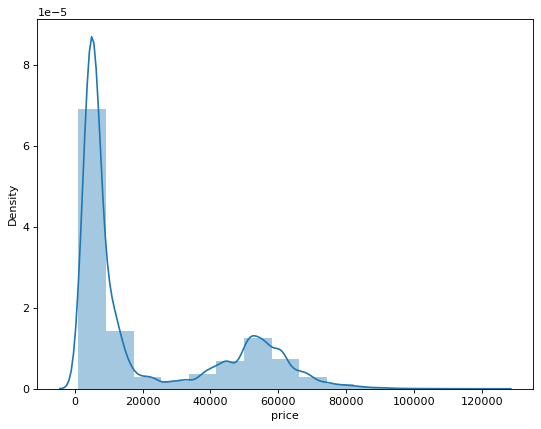

In [27]:
fig = plt.figure()
plt.figure(figsize=(8, 6), dpi=80)
sns.distplot(df['price'], bins = 15)

In [ ]:
plt.boxplot(df['price']);

#### the independet variable is not normal distributed, there are many outliers, so we clean them! 

In [28]:
def calc_iqr(col):
    '''
    function to calculate lower and upper limit for drop 
    outliers of columns 
    based on IRQ-method
    col: column of pandas dataframe

    return: 
    lower and upper limit 
    '''
    q1=np.percentile(col,25)
    q3=np.percentile(col,75)
    iqr=q3 - q1
    lower_bound= q1 - ( 1.5 * iqr)
    higher_bound=q3 + (1.5 * iqr)
    return lower_bound,higher_bound

In [35]:
y=df['price']
_,higher_b=calc_iqr(y)
print('higher boundry: ',higher_b)
dataset_cleaned=df[df['price']<higher_b]
print(f'{len(df)-len(dataset_cleaned)} rows dropped!!')

higher boundry:  99128.0
123 rows dropped!!


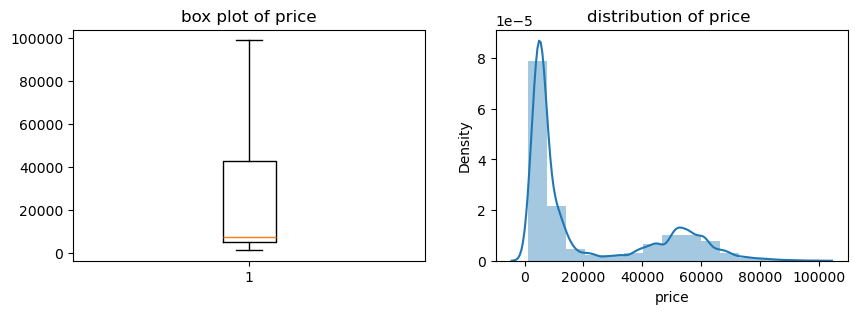

In [36]:
f = plt.figure(figsize=(10,3))
box= f.add_subplot(121)
box.set_title('box plot of price')
distri = f.add_subplot(122)
distri.set_title('distribution of price ')
box.boxplot(dataset_cleaned['price']);
sns.distplot(dataset_cleaned['price'], bins = 15,ax=distri);


### 5.Build a Linear regression Model with all the features (m1)

In [37]:
dataset_cleaned.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
# drop the duplicate index 
dataset_cleaned = dataset_cleaned.drop('Unnamed: 0', axis=1)
dataset_cleaned.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [39]:
# only numerical values 
dataset_cleaned.select_dtypes(exclude='object').head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [40]:
dataset_cleaned.select_dtypes(exclude='number').head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


#### we have only 2 independet numerical values and 8 categorical

### Creating Nominal and Ordinal Variables from Categorical Ones!

some airlines are more expensive, this is the explored order descending 
- Air_India ,Vistara 	
- GO_FIRST ,Indigo , SpiceJet 	
- AirAsia </br>
we consider the airline as nominal and ordinal, as it varies within the 3 groups (2 airlines for g1 and 3 vor g2 ) 


In [46]:
def airline_nominal(airline:str)-> int:
    g1=['Air_India','Vistara']
    g2=['GO_FIRST','Indigo','SpiceJet']
    g3=['AirAsia']
    
    if airline in g1:
        return 3
    elif airline in g2:
        return 2
    else :
        return 1 
dataset_cleaned['airline_ordinal']=dataset_cleaned['airline'].apply(airline_nominal)

In [47]:
# As we know, the price of tickes are more expensive shortly before departure time(part 2) , so we create an ordinal categorie from it!
dataset_cleaned['days_ordinal']=dataset_cleaned['days_left'].apply(lambda days: 2.0 if days<=3 else 1.0 )

In [48]:
dataset_cleaned.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_ordinal,days_ordinal
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,2.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2,2.0


#### nominal ->  flight, source, destination_city --> onehot encoding
#### ordinal -> stops, class,departure_time, arrival_time, airline --> decimal form 1 to n (n-> number of stops/classes)

In [49]:
# explore the nominal ones 
flight=set(dataset_cleaned['flight'])
print('flight ' ,len(flight))

source_city=set(dataset_cleaned['source_city'])
print('source ' ,len(source_city))

destination_city=set(dataset_cleaned['destination_city'])
print('destination ',len(destination_city))


flight  1561
source  6
destination  6


The flight columns are not really suitable for any kind of encoding, 1561 new columns only for flight! </br>
we will have 2 * 6 = 12 new columns,</br>

In [50]:
# nominal categories
# dataset Cleaned and with Categorical 
dataset_c_c = pd.get_dummies(data=dataset_cleaned,columns=['source_city','destination_city','airline'],drop_first=True,dtype=float)
dataset_c_c

,flight,departure_time,stops,arrival_time,class,duration,days_left,price,airline_ordinal,days_ordinal,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SG-8709,Evening,zero,Night,Economy,2.17,1,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UK-995,Morning,zero,Afternoon,Economy,2.25,1,5955,3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,UK-963,Morning,zero,Morning,Economy,2.33,1,5955,3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,Morning,one,Evening,Business,10.08,49,69265,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300149,UK-826,Afternoon,one,Night,Business,10.42,49,77105,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300150,UK-832,Early_Morning,one,Night,Business,13.83,49,79099,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300151,UK-828,Early_Morning,one,Evening,Business,10.00,49,81585,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Other ordinal categories
stops=set(dataset_c_c['stops'])
print('stops ',len(stops),': ',stops)

classes=set(dataset_c_c['class'])
print('classes ' ,len(classes),': ',classes)

times=set(dataset_c_c['departure_time'])
print('times ' ,len(times),': ',times)

stops  3 :  {'one', 'two_or_more', 'zero'}
classes  2 :  {'Business', 'Economy'}
times  6 :  {'Afternoon', 'Early_Morning', 'Night', 'Evening', 'Late_Night', 'Morning'}


In [52]:
# handle class
dataset_c_c['class_ordinal']=dataset_c_c['class'].apply(lambda c: 1.0 if c=='Economy' else 2.0 )

# function to handle stop 
def stops_to_ordinal (stops : str)-> float:
    """
    the idea is, that a direct fly (zeros stop)
    is more expensive than a fly with stops ! 
    """
    if stops== "zero":
        return 3.0
    elif stops== "one":
        return 2.0
    elif stops == "two_or_more":
        return 1.0
    return None

dataset_c_c['stops_ordinal']=dataset_c_c['stops'].apply(stops_to_ordinal)

In [53]:
# for departure and arrival times , we have different orders, so we define different functions for them 
def departure_ordinal(times:str)-> int:
    """
    Calculated in Part 3 descending in avg.price
    
 	Night 	
 	Morning 	
 	Evening 	
 	Early_Morning 	
 	Afternoon 	
 	Late_Night 	
    """
    if times== "Night":
        return 6.0
    elif times== "Morning":
        return 5.0
    elif times == "Evening":
        return 4.0
    elif times =='Early_Morning':
        return 3.0
    elif times =='Afternoon':
        return 2.0
    else : 
        return 1.0
    return None

def arrival_ordinal(times:str)-> int:
    """
    Calculated in Part 3 descending in avg.price
    
 	Evening 	
 	Morning 	
 	Night 	
	Afternoon 	
	Early_Morning 	
	Late_Night 	
    """
    if times== "Evening":
        return 6.0
    elif times== "Morning":
        return 5.0
    elif times == "Night":
        return 4.0
    elif times =='Afternoon':
        return 3.0
    elif times =='Early_Morning':
        return 2.0
    else : 
        return 1.0
    return None

In [54]:
dataset_c_c['departure_ordinal']=dataset_c_c['departure_time'].apply(departure_ordinal)
dataset_c_c['arrival_ordinal']=dataset_c_c['arrival_time'].apply(arrival_ordinal)

In [55]:
dataset_c_c.head(2)

,flight,departure_time,stops,arrival_time,class,duration,days_left,price,airline_ordinal,days_ordinal,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_ordinal,stops_ordinal,departure_ordinal,arrival_ordinal
0,SG-8709,Evening,zero,Night,Economy,2.17,1,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,4.0
1,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0


In [104]:
# drop unnecessary columns (flight, stops, class,arrival_time,departure_time)
final_dataset=dataset_c_c.drop(columns=['flight','stops','class','days_left','arrival_time','departure_time'])
final_dataset.head(2)

,duration,price,airline_ordinal,days_ordinal,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_ordinal,stops_ordinal,departure_ordinal,arrival_ordinal
0,2.17,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,4.0
1,2.33,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0


## Model1 with all of features !

- We will use a linear model , optimized base on Least Squeres Metode and judge by MSE methode, alle of this points
tells us, that we have to standardize or transfor out y-value, because it is in a really high range (indian rupee) and it can caused huge loss value by one signle predicion.

In [59]:
# price as dependent variable
Y=final_dataset['price']/1.0

# and other columns as x values 
columns=list(final_dataset.columns)
columns.remove('price')
X=final_dataset[columns]
X.head(2)

,duration,airline_ordinal,days_ordinal,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_ordinal,stops_ordinal,departure_ordinal,arrival_ordinal
0,2.17,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,4.0
1,2.33,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,
                                                test_size = 0.2, random_state = 999,shuffle=True)
x_train_with_intercept = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_with_intercept).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.138e+05
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:21:33   Log-Likelihood:            -2.4603e+06
No. Observations:              240024   AIC:                         4.921e+06
Df Residuals:                  240002   BIC:                         4.921e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Points to note
#### As you can see, the model has good metrics in relation to Adj. R-squared but:
- AIC(Akaike information criterion) and BIC (Bayesian information criterion) are really high. That is sign of high variance/overfitting( model is to complex --> to many independet vaiables !!)
-  Omnibus and Jarque-Bera tests, in simple terms, assess the normality of the residuals, indicating how likely it is that the calculated regression model conforms to a normal distribution.
   The higher the test statistics, the less likely it is that the residuals follow a normal distribution! we are here far far from normality !!
- The Durbin-Watson Test indicates whether the variance of residuals is constant or not. It's important because if the variance of residuals is not constant, the independent variables ('x values: airline, days left, ...') may not adequately describe the variation of the dependent variable ('price') , so the linearity assumption is not valid ! (best values 1-2) 
    

In [61]:
def analyse_risiduals(ri):
    """ Analyze residuals"""
    
    f = plt.figure(figsize=(15,5))

    box= f.add_subplot(131)
    box.set_title('distribution of Risiduals')
    box.boxplot(ri);
    
    distri = f.add_subplot(132)
    distri.set_title('distribution of Risiduals')
    sns.distplot(ri, bins = 15,ax=distri);
    
    normality=f.add_subplot(133)
    scipy.stats.probplot(ri,plot=normality);
    
    plt.show()

RMSE for Testdata :  6850.038


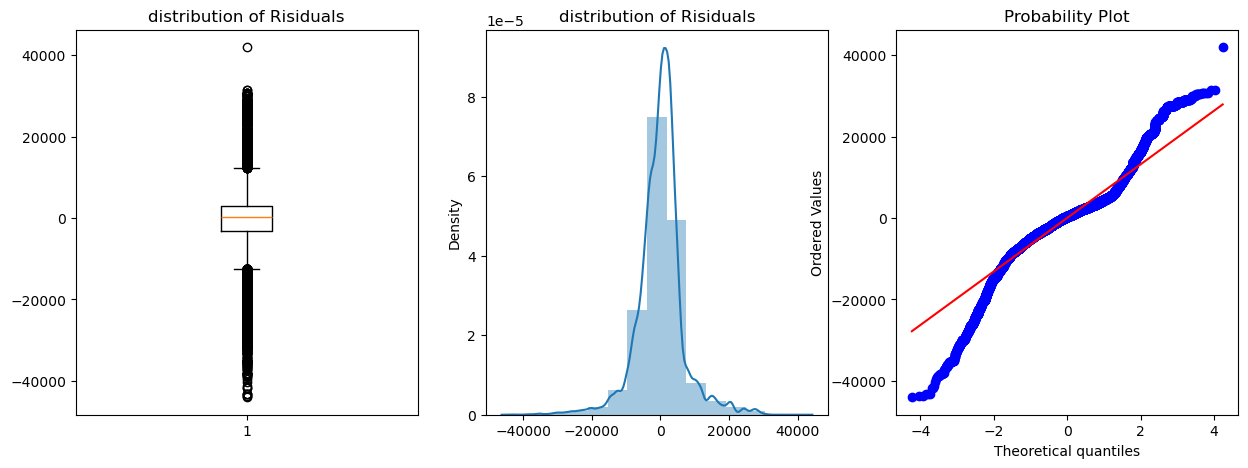

In [62]:
#Look at model plot
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = model1.predict(x_test_with_intercept)
test_loss= round (sm.tools.eval_measures.rmse(y_test_fitted,y_test),3)
print('RMSE for Testdata : ', test_loss)
ri= y_test_fitted - y_test
analyse_risiduals(ri)

### As we can see, the residuals of the test dataset are definitely not normally distributed. This can be a sign of non-linearity, multicollinearity, and non-constant variance of the dependent variable!

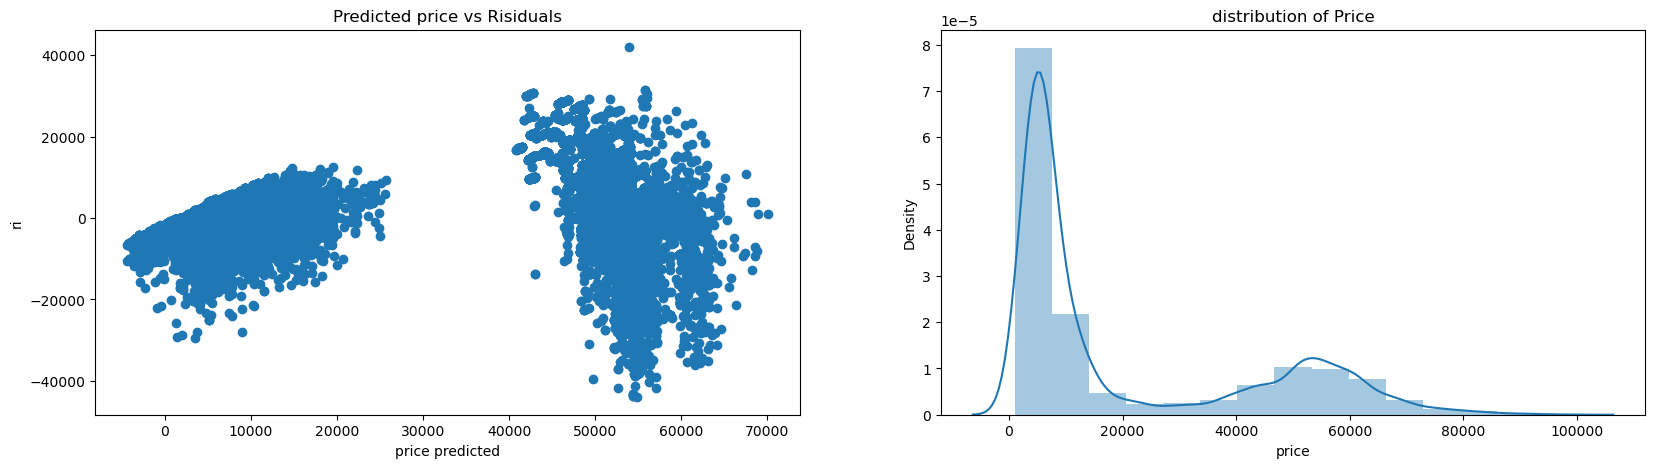

In [63]:
# risiduals vs predictions and 
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)
ax.scatter(y_test_fitted,ri)
plt.xlabel('price predicted')
plt.ylabel('ri')
plt.title('Predicted price vs Risiduals')

# distribution of price in test-dataset
distri = f.add_subplot(122)
distri.set_title('distribution of Price')
sns.distplot(y_test, bins = 15,ax=distri);

plt.show()


### the shape of risiuals in relation to prediction shows:
- the down and up trend in the left plot tell us, that our x-variables can't explain the variance of ticket prices in a linear way !
- As we see in the plot on the left side , the model is good at predicting ticket price for tickets up to 20000 rupes !</br>
The non-linearity is in this range not as strong as the range between 4000-6000! 
- Next point is, that the model is not able to predict any prices for ticket in range round about 20000-40000
- The range from 20,000 to 40,000 in the dataset is sparsely populated.

## Model2!
### using some techniks to improve the performance of the model

### Step1 :
points to consider: 
- The prices are in inidan ruppee and in big range (possible numerical instability).
-  We are trying to create a simple linear regression based on Least Least Squares, based on our price range, the  error's are very large</br>
trying some transformation on price to have a better normality in distribution and samaller range could be helpfull ! 

In [105]:
from scipy.stats import boxcox

In [106]:
Y=final_dataset['price']/1.0
log_trafo=np.log(Y)
sqrt_trafo=np.sqrt(Y)
# we need to save the lambda parameter , so reverse the transformation for our predictions
box_trafo,lambda_box=boxcox(Y)

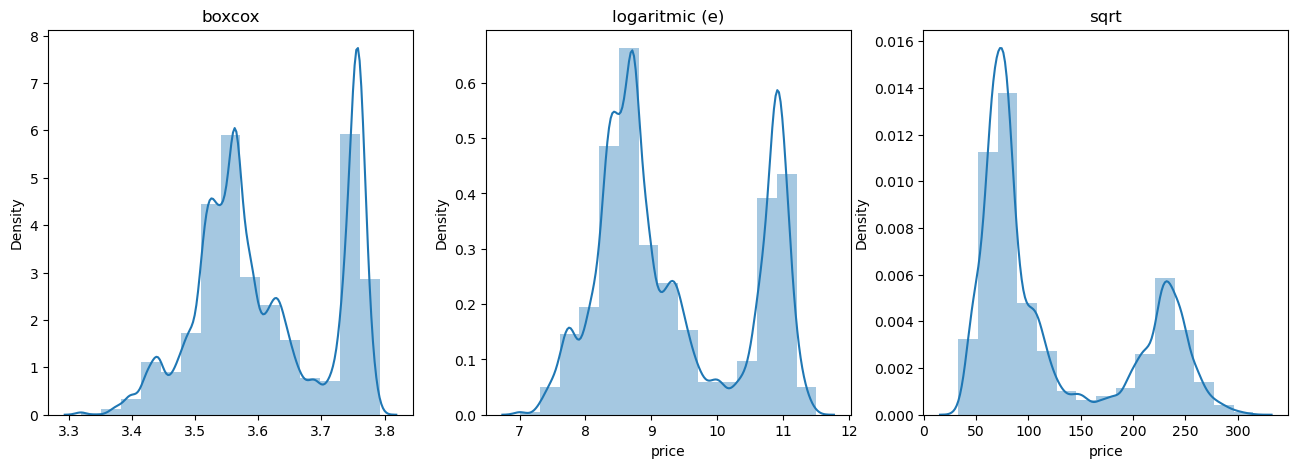

In [107]:
f = plt.figure(figsize=(16,5))

box= f.add_subplot(131)
box.set_title('boxcox')
sns.distplot(box_trafo, bins = 15,ax=box);

log = f.add_subplot(132)
log.set_title('logaritmic (e)')
sns.distplot(log_trafo, bins = 15,ax=log);

sqrt=f.add_subplot(133)
sqrt.set_title('sqrt')

sns.distplot(sqrt_trafo, bins = 15,ax=sqrt);

plt.show()

In [135]:
# adding the new columns to dataset for further test 
final_dataset=dataset_c_c.drop(columns=['flight','stops','class','days_left','arrival_time','departure_time'])
final_dataset['price_trafo_sqrt']=sqrt_trafo
final_dataset['price_trafo_log']=log_trafo
final_dataset['price_trafo_box']=box_trafo
final_dataset.head(1)

,duration,price,airline_ordinal,days_ordinal,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_ordinal,stops_ordinal,departure_ordinal,arrival_ordinal,price_trafo_sqrt,price_trafo_log,price_trafo_box
0,2.17,5953,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,4.0,77.155687,8.691651,3.559726


### Step2 : 
- Remove weakly correlated variables
- detecting potentily multicollinearity between variables (tendency to numeric instability )
- creating combined variables

In [146]:
# the dataset hat many column, so i will dive it to two parts
price_cololumns=[col_name for col_name in final_dataset.columns if 'trafo' in col_name]
price_cololumns.extend(['price'])
first_part=[]
first_part=['duration','airline_ordinal','days_ordinal','class_ordinal','stops_ordinal','departure_ordinal','arrival_ordinal']
first_part.extend(price_cololumns)

In [147]:
first_part

['duration',
 'airline_ordinal',
 'days_ordinal',
 'class_ordinal',
 'stops_ordinal',
 'departure_ordinal',
 'arrival_ordinal',
 'price_trafo_sqrt',
 'price_trafo_log',
 'price_trafo_box',
 'price']

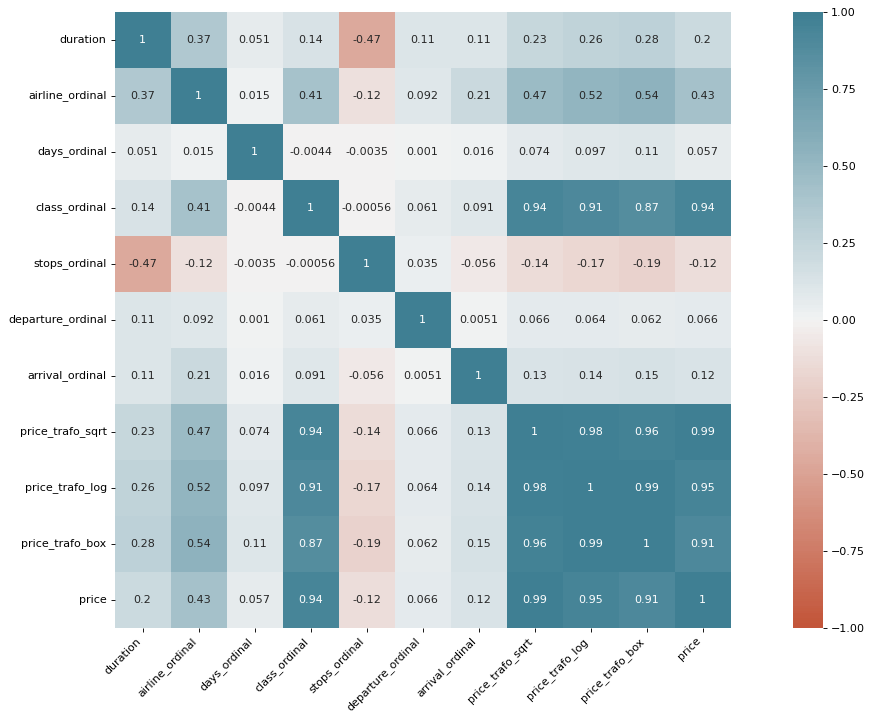

In [148]:
corr1=final_dataset[first_part].corr()
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.heatmap(
    corr1,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate la

- weakly correlated vaiables: days_ordinal, stops_ordinal, departure and arrival ordinal
- possible multicollinearity : nothing

In [149]:
second_part=[ col for col in list(final_dataset.columns) if col not in first_part]
#print(second_part)
second_part.extend(price_cololumns)
#print(second_part)

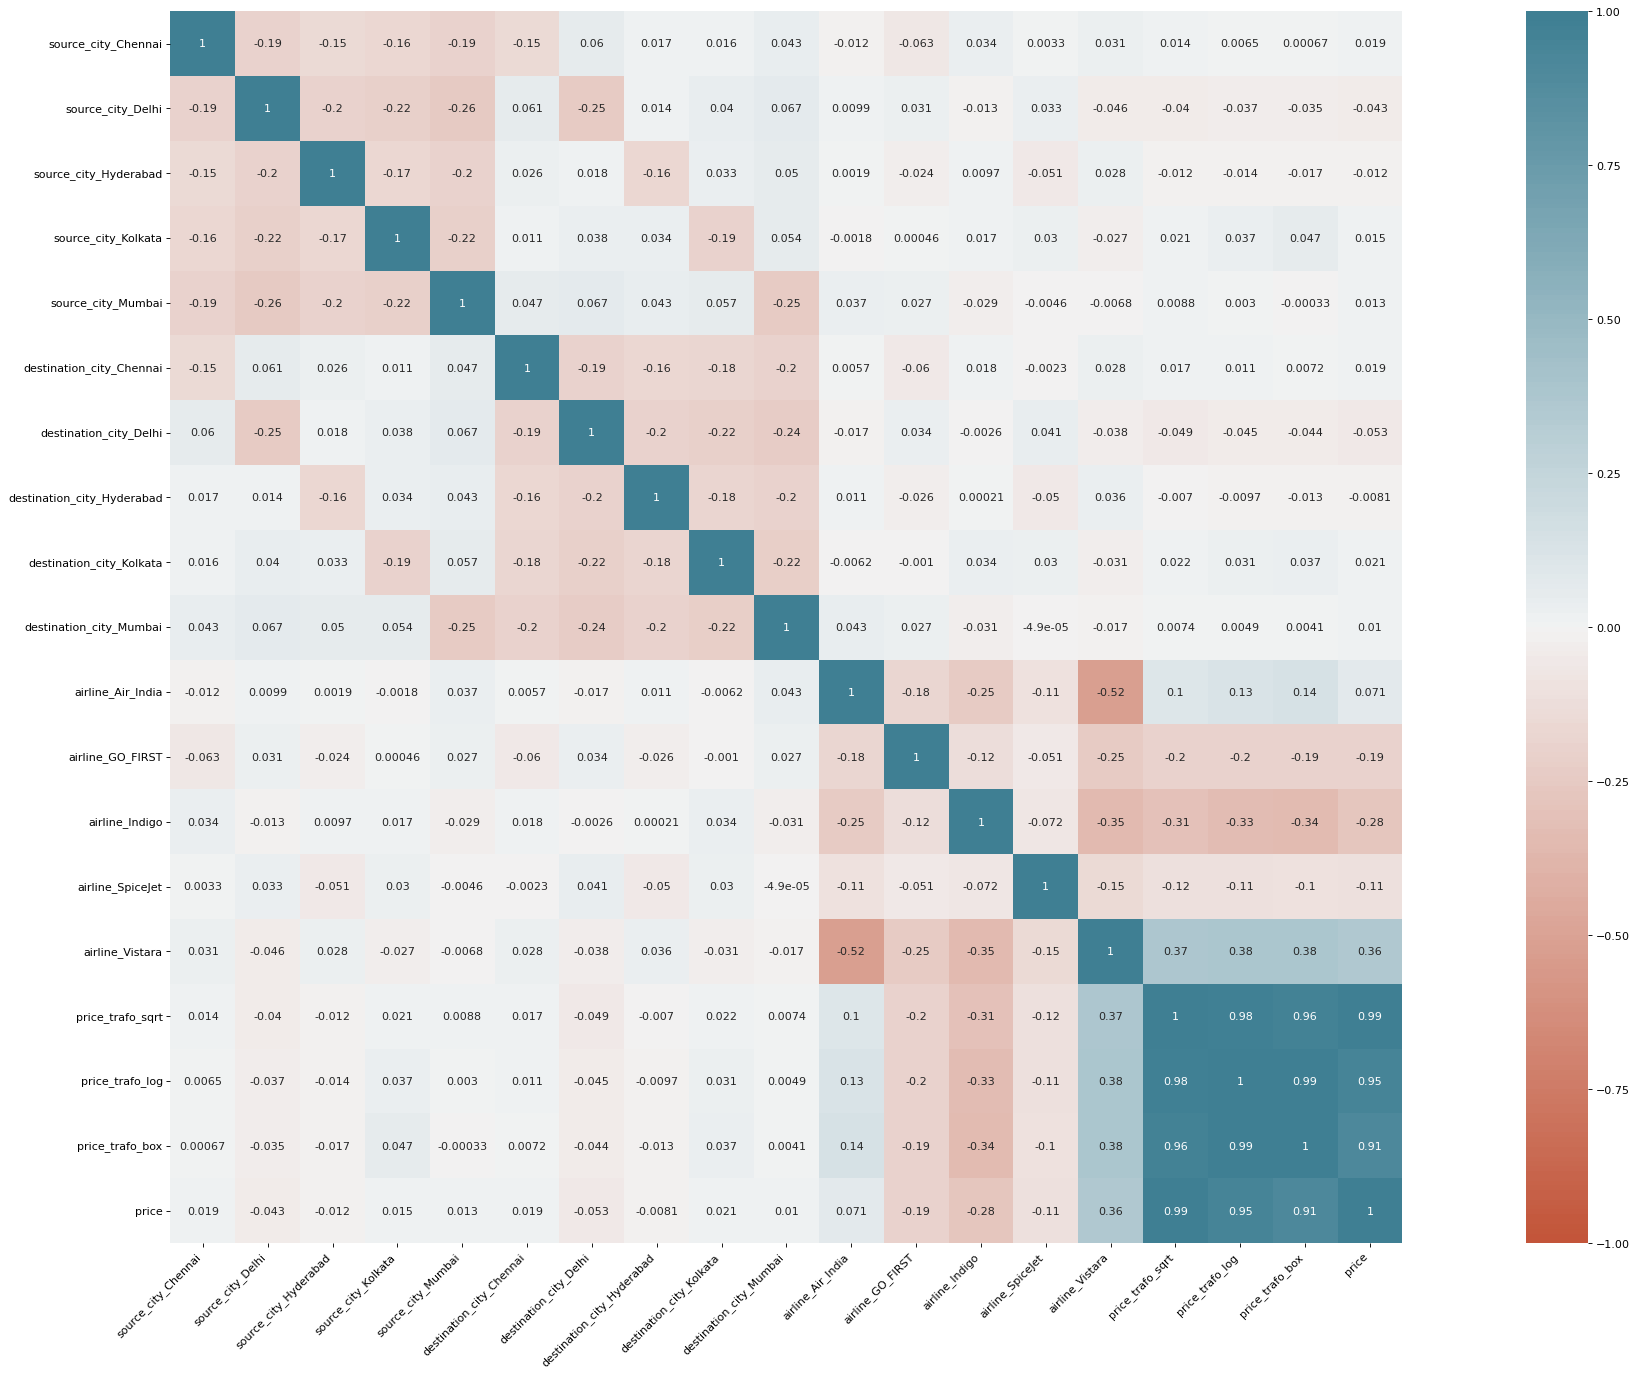

In [150]:
# For other variables
corr2=final_dataset[second_part].corr()
plt.figure(figsize=(40, 20), dpi=80)
ax = sns.heatmap(
    corr2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate la


- weakly correlated: every thing with source and destination
- not any strong multicolinarity

#### creating combined variables

In [152]:
# possible combinations: 

# based on assumptions: higher class & long duration -> higher price , higher class & small days_left -> higher price ,
# higher class & less stop -> higher price , 
final_dataset['combi_duration_class']=final_dataset['duration'] * final_dataset['class_ordinal']
final_dataset['combi_days_class']=final_dataset['days_ordinal'] * final_dataset['class_ordinal']
final_dataset['combi_stops_class']=final_dataset['stops_ordinal'] * final_dataset['class_ordinal']

# based on assumptions : departure & duration (some of deperture and arrival times are more likly with longer and shorter duration ) 
final_dataset['combi_departure_duration']=final_dataset['departure_ordinal'] * final_dataset['duration']
final_dataset['combi_arrival_duration']=final_dataset['arrival_ordinal'] * final_dataset['duration']

# based on : class & airline (some classes are more expensive in some airlines),
final_dataset['combi_airline_class']=final_dataset['airline_ordinal'] * final_dataset['class_ordinal']
# airline & days_ordinal (some airlines are more expensive than others shortly before departure time or vice versa)
final_dataset['combi_airline_days']=final_dataset['airline_ordinal'] * final_dataset['days_ordinal']

combined_part=[col_name for col_name in final_dataset.columns if 'combi_' in col_name ]
combined_part.extend(price_cololumns)

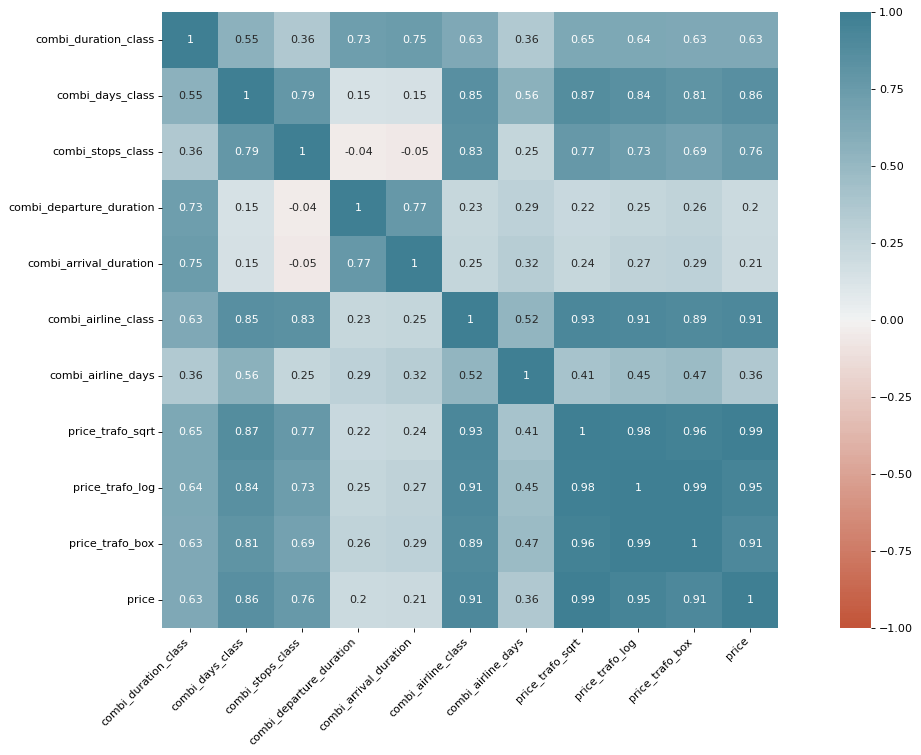

In [154]:
corr3=final_dataset[combined_part].corr()
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.heatmap(
    corr3,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate la

- weakly correlated: Source and destination cities, depearture and arrival times 
- multicollinearity : Multicollinearity is evident, but mostly across multiple columns, which will be dropped due to weak correlations!


In [155]:
# dropping everything about source and destination cities
to_drop=[col_name for col_name in final_dataset.columns if 'city' in col_name ]
final_dataset.drop(to_drop,axis=1,inplace=True)

In [156]:
final_dataset.head(1)

,duration,price,airline_ordinal,days_ordinal,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_ordinal,stops_ordinal,departure_ordinal,arrival_ordinal,price_trafo_sqrt,price_trafo_log,price_trafo_box,combi_duration_class,combi_days_class,combi_stops_class,combi_departure_duration,combi_arrival_duration,combi_airline_class,combi_airline_days
0,2.17,5953,2,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,4.0,77.155687,8.691651,3.559726,2.17,2.0,3.0,8.68,8.68,2.0,4.0


### Creating different models to comapare the results

In [163]:

results['a']={'b':1,'c':2}

In [169]:
from typing import List,Dict

def model_tester(df,price_col):
    """
    df: pandas dataframe
    price_col: list of columns to use as dependent variable 
    
    return:
        dic {'trained_on': y_column ,{'ri' : risiduals of Test-dataset ,'r_squared' : r_squared} )
    """
    # dictionary to return the results
    results:Dict[str:str,Dict[str:float,str:float]]={}
    # creating x-values
    col_x=[col_name for col_name in final_dataset.columns if col_name not in price_col]
    X=df[col_x]
    for y_name in price_col:
        Y=df[y_name]
        x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,
                                                        test_size = 0.2, random_state = 999)
        x_train_with_intercept = sm.add_constant(x_train)
        model = sm.OLS(y_train, x_train_with_intercept).fit()
        r_squared= model.rsquared
        #print(f'R_squared of the model with {y_name}: {r_squared} ')
        x_test_with_intercept = sm.add_constant(x_test)
        y_test_fitted = model.predict(x_test_with_intercept)
        #test_loss= round (sm.tools.eval_measures.rmse(y_test_fitted,y_test),3)
        ri= y_test_fitted - y_test
        results[y_name]={'ri':ri,'r_squared':r_squared}
    return results

In [170]:
results=model_tester(final_dataset,price_cololumns)

 model trained on price_trafo_sqrt wit R_squared: 0.9352431629059553



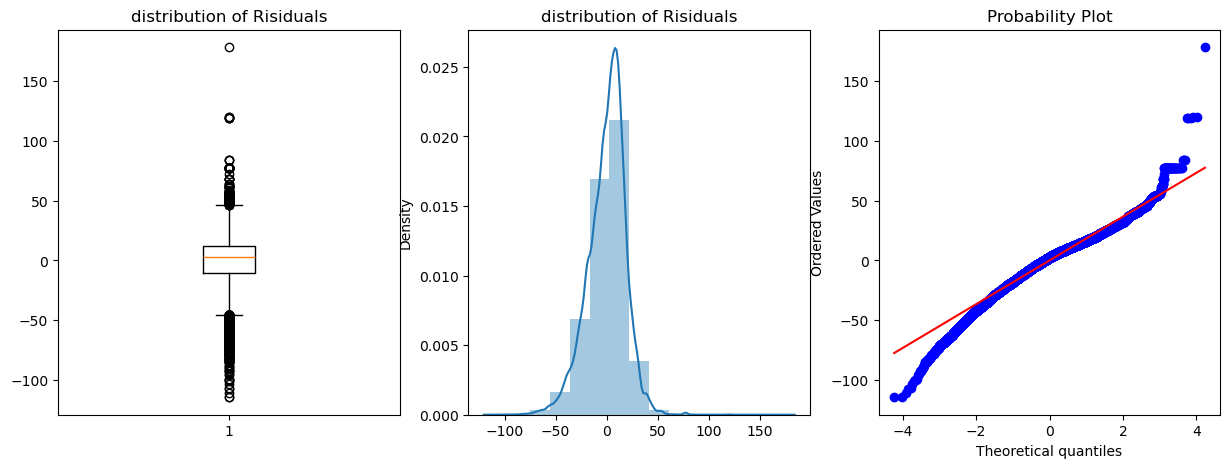

In [179]:
print(f' model trained on price_trafo_sqrt wit R_squared: {results["price_trafo_sqrt"]["r_squared"]}')
print()
analyse_risiduals(results['price_trafo_sqrt']['ri'])

 model trained on price_trafo_log wit R_squared: 0.8903716424533392



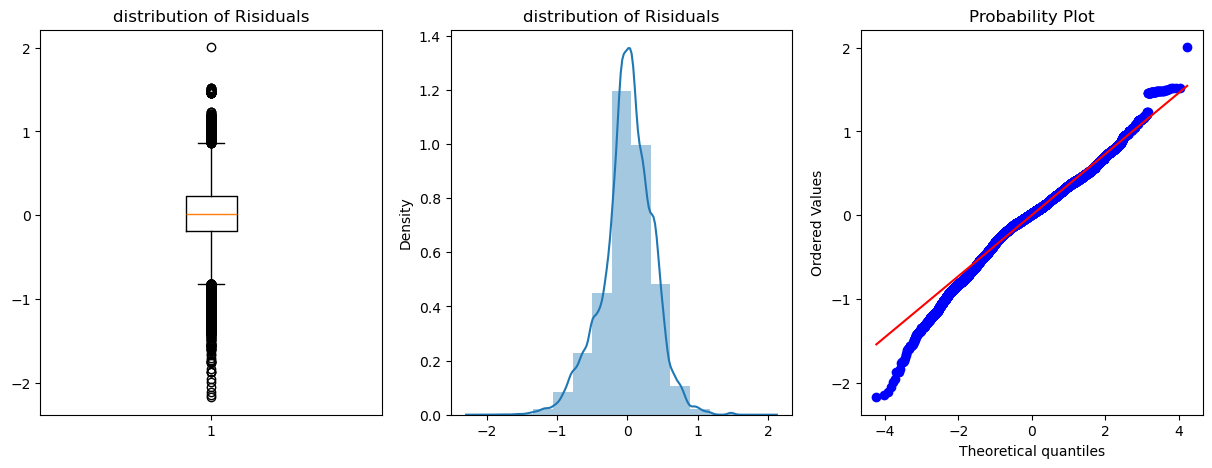

In [180]:
print(f' model trained on price_trafo_log wit R_squared: {results["price_trafo_log"]["r_squared"]}')
print()
analyse_risiduals(results['price_trafo_log']['ri'])

 model trained on price_trafo_box wit R_squared: 0.8437170896418551



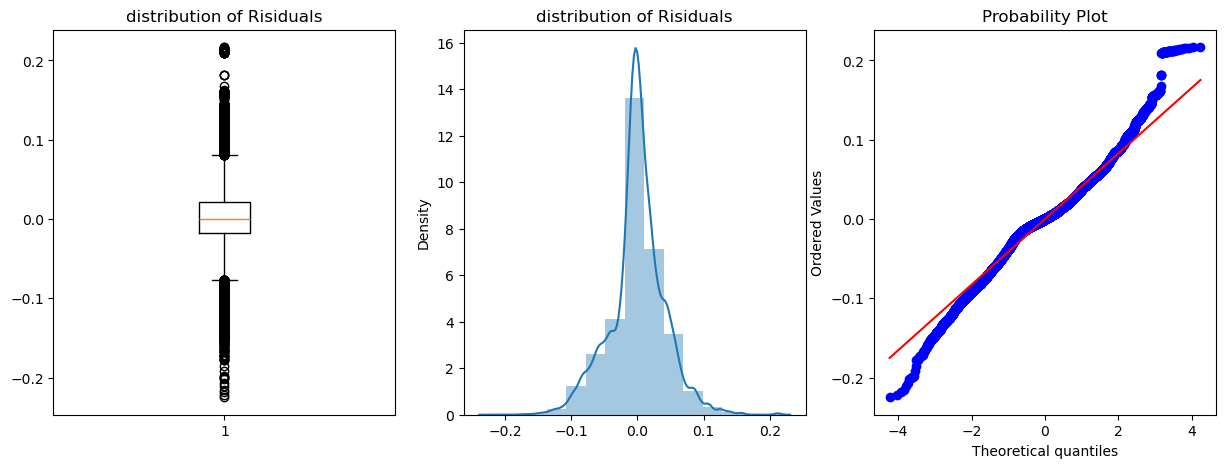

In [181]:
print(f' model trained on price_trafo_box wit R_squared: {results["price_trafo_box"]["r_squared"]}')
print()
analyse_risiduals(results['price_trafo_box']['ri'])

## the results are much better than the first model , another good idea would be to divide the dataset , based on transformed distributions of Price in 2 Parts and train 2 different models for the price predecting :-)